<a href="https://colab.research.google.com/github/sindahkimi3-dotcom/sindahkimi.github.io/blob/main/Mod%C3%A9leAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAE = 0.45860699999999854
RMSE = 0.7610251238296982
R² = 0.994383823438455


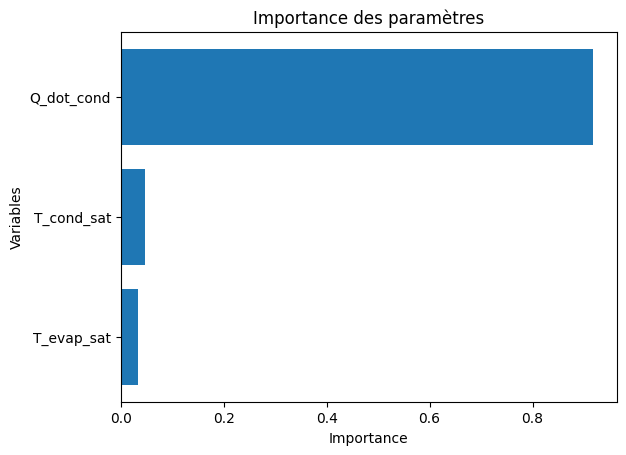

Wcomp prédit = 3.844310000000002 kW


['random_forest_Wcomp.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
data = pd.read_csv("Tabledataset (1).csv", sep=';', decimal=',', skiprows=[1])
data.head()
X = data[[
    "T_evap_sat",
    "T_cond_sat",
    "Q_dot_cond"
]]

y = data["W_dot_comp"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE =", mae)
print("RMSE =", rmse)
print("R² =", r2)
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title("Importance des paramètres")
plt.show()
nouvelle_valeur = pd.DataFrame([[
    -11,
    45,
    14.44
]], columns=X.columns)

prediction = model.predict(nouvelle_valeur)
print("Wcomp prédit =", prediction[0], "kW")

import joblib
joblib.dump(model, "random_forest_Wcomp.pkl")

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Saving Tabledataset.csv to Tabledataset (1).csv
User uploaded file "Tabledataset (1).csv" with length 1986 bytes
